In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

import pandas as pd
import numpy as np

import pickle

import random
from sklearn.metrics.pairwise import euclidean_distances

import numpy as np
from sklearn.decomposition import PCA

import tensorflow as tf

In [ ]:
from model_fit_functions import calculate_reconstr_loss_spca, rescale_back
from data_load import load_split_pool

In [ ]:
# Load data 
directory_list = ['./data/']
data_dict =  load_split_pool(1346, 430, 10, scale = True, directory_list = directory_list)

# Pooled X data
train_df_pooled = data_dict["x_pooled"]["train"]
val_df_pooled = data_dict["x_pooled"]["val"]

Directory: /content/gdrive/MyDrive/GSOC_code/prelim_data/data Physical properties shape: (2156, 5) Spectral prop shape: (2156, 110001)
Spectral data shape (2156, 110001)
Physical data shape (2156, 5)


In [ ]:
# Rescale vlaidation set back:
val_df_pooled_rescaled = rescale_back(val_df_pooled, data_dict["parameters"]["mean"], data_dict["parameters"]["std"]) 

## Load estimated models from pickled objects

In [ ]:
# Folder path to outpus:
outputs_path = './outputs/'

# Autoencoder

file = open(outputs_path + 'spca_results_5.txt','rb')
autoenc_simple = pickle.load(file)
file.close()


# Sparse PCA (the number in the filename is lambda regularisation parameter )

# lambda = 7
file = open(outputs_path + 'spca_results7_new.txt','rb')
spca_alpha7 = pickle.load(file)
file.close()

# lambda = 5
file = open(outputs_path + 'spca_results5_new.txt','rb')
spca_alpha5 = pickle.load(file)
file.close()

# lambda = 4.5
file = open(outputs_path + 'spca_results45_new.txt','rb')
spca_alpha45 = pickle.load(file)
file.close()

# lambda = 3.5
file = open(outputs_path + 'spca_results35_new.txt','rb')
spca_alpha35 = pickle.load(file)
file.close()

# lambda = 2.5
file = open(outputs_path +  'spca_results_025_new.txt','rb')
spca_alpha35 = pickle.load(file)
file.close()

# lambda = 1
file = open(outputs_path +  'spca_results_01.txt','rb')
spca_alpha1 = pickle.load(file)
file.close()

# lambda = 0 (same as PCA)
file = open(outputs_path +  'spca_results00_new.txt','rb')
spca_alpha00 = pickle.load(file)
file.close()

# lambda = 2.5 plus change ridge penalty - this has no effect on the estimates so not used here
file = open(outputs_path + 'spca_results_25_100_ridge_new_small.txt','rb')
spca_alpha25 = pickle.load(file)
file.close()

# Random projections (two different objects, one fitted to a finer grid of n_components,
# another one for a coarser but longer grid to check convergence properties)

file = open(outputs_path + 'randomproj_sequence_long','rb')
spca_randp_long = pickle.load(file)
file.close()

file = open(outputs_path + 'randomproj_sequence','rb')
spca_randp = pickle.load(file)
file.close()

file = open(outputs_path + 'pca_tau_loss','rb')
pca_tau_loss = pickle.load(file)
file.close()

file = open(outputs_path + 'pca','rb')
pca = pickle.load(file)
file.close()

file = open(outputs_path + 'pca_trim','rb')
pca_trim = pickle.load(file)
file.close()

file = open(outputs_path + 'simple_autoenc_object','rb')
autoencoder = pickle.load(file)
file.close()
# "simple_autoenc_object"

file = open(outputs_path + 'simple_autoencoder_loss_finegrid','rb')
autoenc_simple_fineg = pickle.load(file)
file.close()

file = open(outputs_path + '6layer_autoencoder_loss_finegrid','rb')
autoenc_6layer_fineg = pickle.load(file)
file.close()


# Load VAE losses
loss_vae_gaus_indep_prior =pd.read_csv(outputs_path + 'loss_gaussindep.csv')
loss_vae_gaus_mix_prior =pd.read_csv(outputs_path + 'loss_gaussmixture.csv')

file = open(outputs_path + 'simple_autoenc_object','rb')
simple_autoenc_object = pickle.load(file)
file.close()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:

### Autoencoder: 4 layers
# Load full object
file = open(outputs_path + 'simple_autoenc_object','rb')
autoencoder = pickle.load(file)
file.close()
# Load reconstruction loss
file = open(outputs_path + 'simple_autoencoder_loss_finegrid','rb')
autoenc_simple_fineg = pickle.load(file)
file.close()
# Custom activation: load reconstruction loss
file = open(outputs_path + 'simple_autoencoder_loss_finegrid_customact','rb')
autoenc_simple_fineg_customact = pickle.load(file)
file.close()
# - some bottleneck sizes did not ru ncorrectly, so load revised loss for these dims:
file = open(outputs_path + 'simple_autoencoder_loss_finegrid_customact_dime1234','rb')
simple_autoenc_object_customact_dim1234 = pickle.load(file)
file.close()

### Autoencoder: 6 Layers
# linear activation: reconstr loss 
file = open(outputs_path + '6layer_autoencoder_loss_finegrid','rb')
autoenc_6layer_fineg = pickle.load(file)
file.close()
# custom activation: reconstr loss
file = open(outputs_path + '6layer_autoencoder_loss_finegrid_customact','rb')
autoenc_6layer_fineg_customact = pickle.load(file)
file.close()
# conv 1d unit
file = open(outputs_path + '6layer_autoencoder_loss_finegrid_conv_customact','rb')
autoenc_6layer_conv_fineg_customact = pickle.load(file)
file.close()


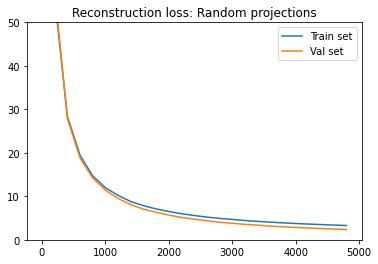

In [ ]:
# Plot loss for the random porjections methods

train_dict_long = spca_randp_long["train"]
val_dict_long = spca_randp_long["val"]

n_comp_list = list(val_dict_long.keys())
losses_train_list = [train_dict_long[i]["loss_train"] for i in val_dict_long.keys()]
losses_val_list = [val_dict_long[i]["loss_val"] for i in val_dict_long.keys()]

losses_val_list_adj = list( np.array(losses_val_list)*np.sqrt( np.array(n_comp_list)/val_df_pooled.shape[1] ) )
losses_trainl_list_adj = list( np.array(losses_train_list)*np.sqrt( np.array(n_comp_list)/train_df_pooled.shape[1] ) )


fig, ax = plt.subplots()
ax.plot( np.array(n_comp_list), np.array(losses_train_list) , label = "Train set")
ax.plot( np.array(n_comp_list), np.array(losses_val_list), label = "Val set" )
# ax.set_xlim([50, 250])
ax.set_ylim([0, 50])
ax.set_title("Reconstruction loss: Random projections")
ax.legend()

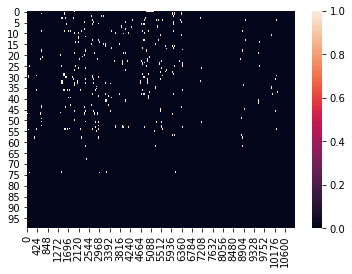

In [ ]:
# Plot sparsity of the most regularised matrix estimate
ax = sns.heatmap(pd.DataFrame(np.abs(spca_alpha7[7]["spca_object"].components_[:250, :]) > 0))
plt.show()

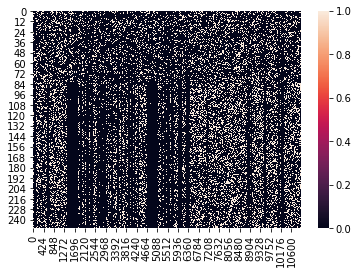

In [ ]:
# Plot sparsity of the least regularise dmatrix estimate
ax = sns.heatmap(pd.DataFrame(np.abs(spca_alpha1[1]["spca_object"].components_[:250, :]) > 0))
plt.show()

In [ ]:
# Number of elements to use / size of dimension to which to reduce

n_comp_list_pca = list( np.arange(1, 100, 2) )

In [ ]:
# For different values of regularisation parameter and different number
# of components, calculate reconstructoion loss of pca.

# These losses are stored in separate lists, and later plotted.

random.seed(8765)

spca_loss_aplha5 = []
spca_loss_aplha1 = []
spca_loss_aplha25 = []
spca_loss_aplha35 = []
spca_loss_aplha45 = []
spca_loss_aplha7 = []
spca_loss_aplha0 = []

# to do: def calculate_loss_and_distances_spca(spca_dict)

for n_comp in n_comp_list_pca:
    
    loss5  = calculate_reconstr_loss_spca(spca_alpha5[5], val_df_pooled, n_comp, data_dict["parameters"]["mean"], data_dict["parameters"]["std"])
    loss1  = calculate_reconstr_loss_spca(spca_alpha1[1], val_df_pooled, n_comp, data_dict["parameters"]["mean"], data_dict["parameters"]["std"])
    loss25 = calculate_reconstr_loss_spca(spca_alpha25[2.5], val_df_pooled, n_comp, data_dict["parameters"]["mean"], data_dict["parameters"]["std"])
    
    loss7  = calculate_reconstr_loss_spca(spca_alpha7[7], val_df_pooled, n_comp, data_dict["parameters"]["mean"], data_dict["parameters"]["std"])
    loss45  = calculate_reconstr_loss_spca(spca_alpha45[4.5], val_df_pooled, n_comp, data_dict["parameters"]["mean"], data_dict["parameters"]["std"])
    
    loss0 = calculate_reconstr_loss_spca(spca_alpha00[0], val_df_pooled, n_comp, data_dict["parameters"]["mean"], data_dict["parameters"]["std"])
  
    
    spca_loss_aplha5.append(loss5)
    spca_loss_aplha1.append(loss1)
    spca_loss_aplha25.append(loss25)
    spca_loss_aplha45.append(loss45)
    spca_loss_aplha7.append(loss7)
    spca_loss_aplha0.append(loss0)

### PCA

In [ ]:
pca_loss = [ pca["restricted_spaces"][i]["loss"] for i in pca["restricted_spaces"] ]
pca_trim_loss = [ pca_trim["restricted_spaces"][i]["loss"] for i in pca_trim["restricted_spaces"] ]

Text(0.5, 0, 'Number of components')

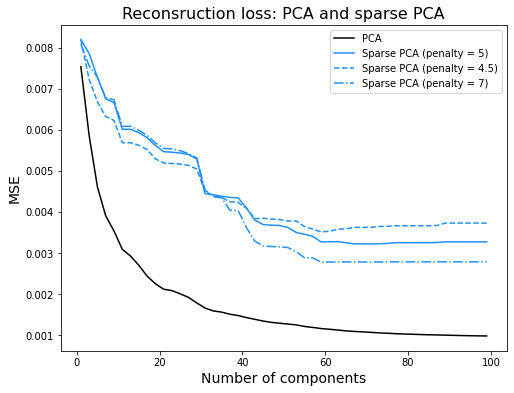

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha0) , label = "PCA", color = "black")
ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha5), label = "Sparse PCA (penalty = 5)" , color = "dodgerblue")
ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha45), label = "Sparse PCA (penalty = 4.5)", color = "dodgerblue",
       linestyle = "--")
ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha7), label = "Sparse PCA (penalty = 7)", color = "dodgerblue", 
        linestyle = "-." )
# ax.plot( np.array(autoenc_simple_fineg["dim"]), np.array(autoenc_simple_fineg["loss"]), label = "Autoencoder (2 layer)", color = "orange" )
ax.legend()
ax.set_title("Reconsruction loss: PCA and sparse PCA", fontsize = 16)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xlabel("Number of components", fontsize = 14)

Text(0.5, 0, 'Number of components')

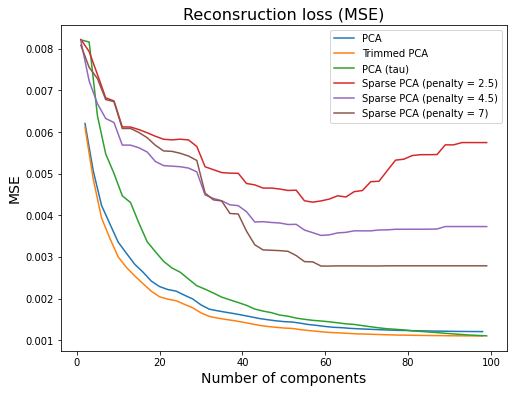

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
n_comp_list_pca_2 = list( np.arange(2, 100, 2) )
ax.plot( np.array(n_comp_list_pca_2), np.array(pca_loss) , label = "PCA")
ax.plot( np.array(n_comp_list_pca_2), np.array(pca_trim_loss) , label = "Trimmed PCA")
ax.plot( np.array(pca_tau_loss["ncomps"]), np.array(pca_tau_loss["loss"]) , label = "PCA (tau)")
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha5), label = "Sparse PCA (penalty = 5)" )
ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha25), label = "Sparse PCA (penalty = 2.5)" )
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha35), label = "Sparse PCA (penalty = 3.5)" )
ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha45), label = "Sparse PCA (penalty = 4.5)" )
ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha7), label = "Sparse PCA (penalty = 7)" )
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha0), label = "Sparse PCA (penalty = 0)" )
# ax.plot( np.array(autoenc_simple["dim"]), np.array(autoenc_simple["loss"]), label = "Autoencoder (2 layer)" )
# ax.plot( np.array(autoenc_pca["dim"]), np.array(autoenc_pca["loss"]), label = "Autoencoder (1 linear layer)" )
ax.legend()
ax.set_title("Reconsruction loss (MSE)", fontsize = 16)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xlabel("Number of components", fontsize = 14)

Text(0.5, 0, 'Number of components')

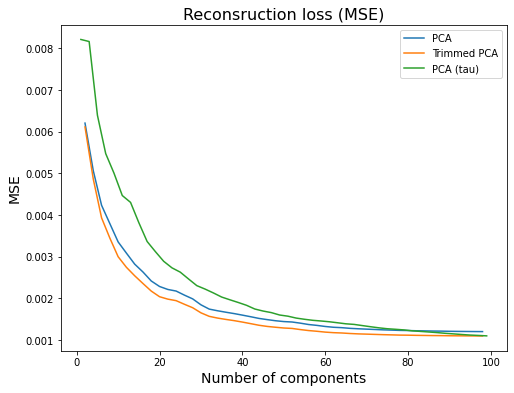

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot( np.array(n_comp_list_pca_2), np.array(pca_loss) , label = "PCA")
ax.plot( np.array(n_comp_list_pca_2), np.array(pca_trim_loss) , label = "Trimmed PCA")
ax.plot( np.array(pca_tau_loss["ncomps"]), np.array(pca_tau_loss["loss"]) , label = "PCA (tau)")
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha5), label = "Sparse PCA (penalty = 5)" )
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha25), label = "Sparse PCA (penalty = 2.5)" )
# # ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha35), label = "Sparse PCA (penalty = 3.5)" )
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha45), label = "Sparse PCA (penalty = 4.5)" )
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha7), label = "Sparse PCA (penalty = 7)" )
# ax.plot( np.array(n_comp_list_pca), np.array(spca_loss_aplha0), label = "Sparse PCA (penalty = 0)" )
# ax.plot( np.array(autoenc_simple["dim"]), np.array(autoenc_simple["loss"]), label = "Autoencoder (2 layer)" )
# ax.plot( np.array(autoenc_pca["dim"]), np.array(autoenc_pca["loss"]), label = "Autoencoder (1 linear layer)" )
ax.legend()
ax.set_title("Reconsruction loss (MSE)", fontsize = 16)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xlabel("Number of components", fontsize = 14)

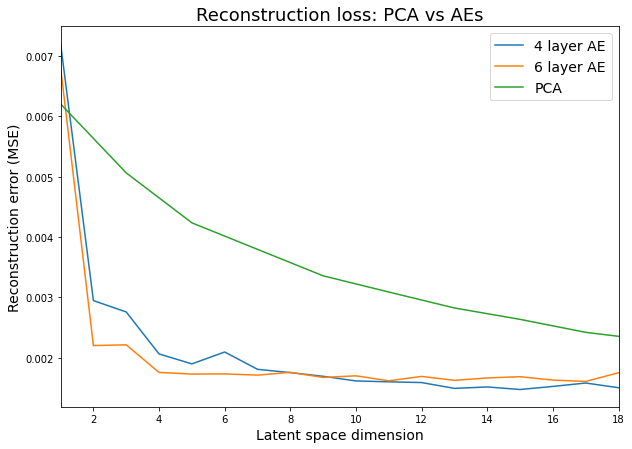

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(autoenc_simple_fineg["dim"], autoenc_simple_fineg["loss"], label = "4 layer AE")
ax.plot(autoenc_6layer_fineg ["dim"], autoenc_6layer_fineg ["loss"], label = "6 layer AE" )
ax.plot( np.array(np.arange(1, 20, 2)), pca_loss[:len(np.array(np.arange(1, 20, 2)))] , label = "PCA")
ax.set_xlabel("Latent space dimension", fontsize = 14)
ax.set_ylabel("Reconstruction error (MSE)", fontsize = 14)
ax.set(xlim = (1,18) )
ax.set_title("Reconstruction loss: PCA vs AEs", fontsize = 18)
ax.legend(fontsize = 14);

In [ ]:
# Porcess VAE losses for easier plotting
loss_vae_gaus_indep_prior_dir = dict()
loss_vae_gaus_indep_prior_dir["loss"] = loss_vae_gaus_indep_prior.iloc[1,:].values[1:].astype(float)
loss_vae_gaus_indep_prior_dir["dims"] = [1, 2, 3, 4, 5]


loss_vae_gaus_mix_prior_dir = dict()
loss_vae_gaus_mix_prior_dir["loss"] = loss_vae_gaus_mix_prior.iloc[1,:].values[1:].astype(float)
loss_vae_gaus_mix_prior_dir["dims"] = [1, 2, 3, 4, 5]

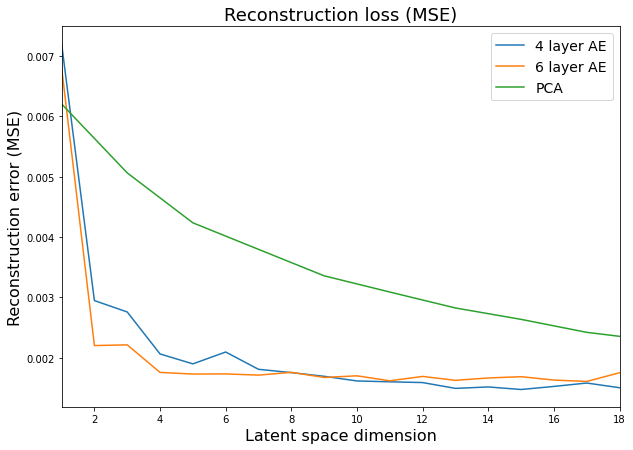

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(autoenc_simple_fineg["dim"], autoenc_simple_fineg["loss"], label = "4 layer AE")
ax.plot(autoenc_6layer_fineg ["dim"], autoenc_6layer_fineg ["loss"], label = "6 layer AE" )
ax.plot( np.array(np.arange(1, 20, 2)), pca_loss[:len(np.array(np.arange(1, 20, 2)))] , label = "PCA")
ax.set_xlabel("Latent space dimension", fontsize = 16)
ax.set_ylabel("Reconstruction error (MSE)", fontsize = 16)
ax.set(xlim = (1,18) )
ax.set_title("Reconstruction loss (MSE)", fontsize = 18)
ax.legend(fontsize = 14);

(1.0, 5.0)

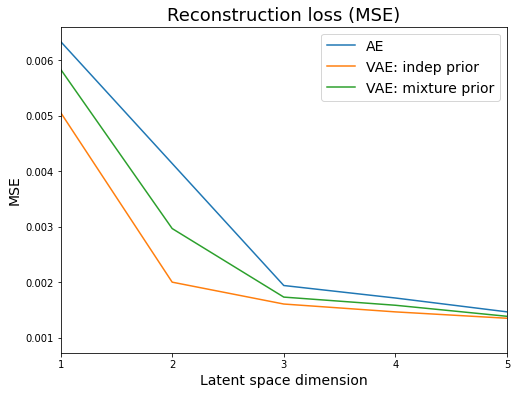

In [ ]:
# Plot AE with and without tanh activation 

# Eliminate the two diemsnions for which the tanh model did not converge
autoenc_simple_customact_loss, autoenc_simple_customact_dim = autoenc_simple_fineg_customact["loss"], autoenc_simple_fineg_customact["dim"]
# autoenc_simple_customact_loss[1], autoenc_simple_customact_dim[1] = simple_autoenc_object_customact_dim1234["loss"][2], 2
autoenc_simple_customact_loss[1], autoenc_simple_customact_dim[1] = np.nan, np.nan
autoenc_simple_customact_loss[2] = simple_autoenc_object_customact_dim1234["loss"][2]

autoenc_simple_customact_loss = [x for x in autoenc_simple_customact_loss if not np.isnan(x)]
autoenc_simple_customact_dim = [x for x in autoenc_simple_customact_dim if not np.isnan(x)]


fig, ax = plt.subplots(figsize = (8, 6))
# ax.plot(autoenc_simple_fineg["dim"], autoenc_simple_fineg["loss"], label = "4 layer AE")
# ax.plot(simple_autoenc_object_customact_dim1234["dim"], simple_autoenc_object_customact_dim1234["loss"])
ax.plot(autoenc_simple_customact_dim, autoenc_simple_customact_loss, label = "AE" )
ax.plot(loss_vae_gaus_indep_prior_dir["dims"], loss_vae_gaus_indep_prior_dir["loss"], label = "VAE: indep prior" )
ax.plot(loss_vae_gaus_mix_prior_dir["dims"], loss_vae_gaus_mix_prior_dir["loss"], label = "VAE: mixture prior" )
# ax.plot(simple_autoenc_object_customact_dim1234["loss"] )
# ax.plot( np.array(np.arange(1, 20, 2)), pca_loss[:len(np.array(np.arange(1, 20, 2)))] , label = "PCA")
ax.set_xlabel("Latent space dimension", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set(xlim = (1,18) )
ax.set_title("Reconstruction loss (MSE)", fontsize = 18)

ax.legend(fontsize = 14);

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([1, 2, 3, 4, 5])
ax.set_xlim([1,5])


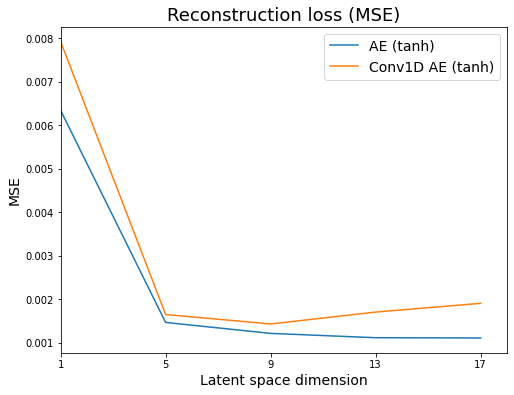

In [ ]:
# Plot AE with and without tanh activation 

# include just dims for which Conv1D net was run
index_autoencConv = list(np.array(autoenc_6layer_conv_fineg_customact["dim"])-1)
# subset simple autoencdoer loss accordingly
autoenc_simple_customact_dim_subset = [autoenc_simple_fineg_customact["dim"][i] for i in index_autoencConv]
autoenc_simple_customact_loss_subset = [autoenc_simple_fineg_customact["loss"][i] for i in index_autoencConv]

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(autoenc_simple_customact_dim_subset, autoenc_simple_customact_loss_subset, label = "AE (tanh)" )
ax.plot(autoenc_6layer_conv_fineg_customact["dim"], 
        autoenc_6layer_conv_fineg_customact["loss"], label = "Conv1D AE (tanh)" )
# ax.plot( np.array(np.arange(1, 20, 2)), pca_loss[:len(np.array(np.arange(1, 20, 2)))] , label = "PCA")
ax.set_xlabel("Latent space dimension", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set(xlim = (1,18) )
ax.set_title("Reconstruction loss (MSE)", fontsize = 18)
ax.set_xticks(autoenc_6layer_conv_fineg_customact["dim"])
ax.set_xticklabels(autoenc_6layer_conv_fineg_customact["dim"])
ax.legend(fontsize = 14);